In [1]:
import numpy as np
import pandas as pd
import h5py
import sys
import matplotlib.pyplot as plt
from statistics import mean
import scipy
from pathlib import Path

In [143]:
#path = "/Users/kirahart/Dropbox/BB_test/NUC_3hr_run1_BB"
path = '/Volumes/KESU/may19/LUTS/longhot.h5'

In [144]:
with h5py.File(path , 'r') as f:
    imgs1_50 = np.array(f['imgs1'])
    imgs2_50 = np.array(f['imgs2'])
    temps1_50 = np.array(f['temps1'])
    temps2_50 = np.array(f['temps2'])
    


No handles with labels found to put in legend.


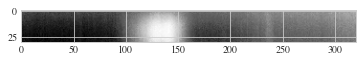

10.2

In [146]:
plt.imshow(imgs1_50[50][130:160],cmap = 'Greys_r')
plt.legend()
plt.show()

max(temps1_50)

In [130]:
temps = []
for i in range(len(temps1_50)):
    t = temps1_50[i]
    if t > 100:
        tcorr =  -(6553.5 - t)
        temps.append(tcorr)
    else:
        temps.append(t)

In [147]:
xmin = 150 
xmax = 200

y = 150
active = 125

#Plotting Options
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.style.use('seaborn-whitegrid')

textwidth = 5.9

plt.rc('font', size=SMALL_SIZE)
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams["font.family"] = "Times"

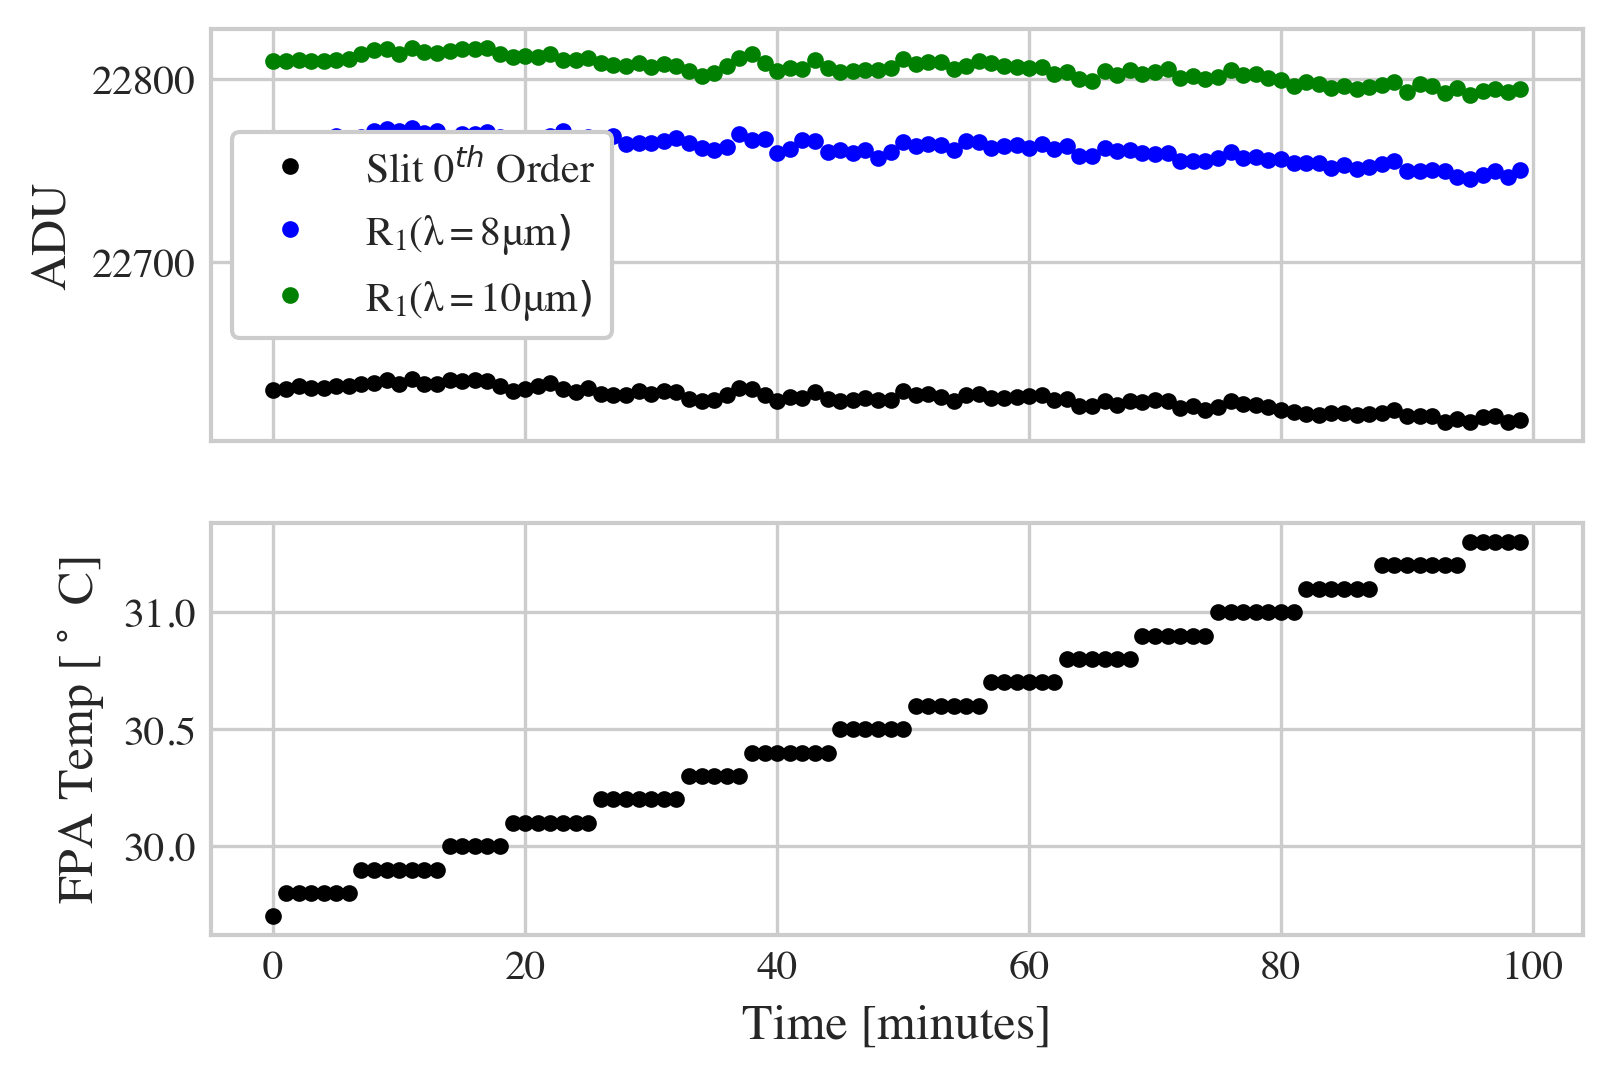

In [194]:
fig ,ax = plt.subplots(2,figsize = [textwidth,4],sharex = True)

ax[0].plot(np.mean(np.mean(imgs1_50[:,125:150,xmin:xmax],axis = 1),axis = 1),'.k',label = 'Slit 0$^{th}$ Order')
ax[0].plot(np.mean(np.mean(imgs1_50[:,125:150,120:125],axis = 1),axis = 1),'.b',label = '$\mathdefault{R_1 (\lambda = 8 \mu m})$')
ax[0].plot(np.mean(np.mean(imgs1_50[:,125:150,130:140],axis = 1),axis = 1),'.g',label = '$\mathdefault{R_1 (\lambda = 10 \mu m})$')

ax[1].plot(temps,'k.')
ax[1].set_ylabel('FPA Temp [$^\circ$ C]')
ax[1].set_xlabel('Time [minutes]')
#ax[0].set_ylim([20650,23300])
plt.gcf().set_dpi(300)
ax[0].legend(framealpha=1, frameon=True)
ax[0].set_ylabel('ADU')
legend.get_frame().set_facecolor('w')

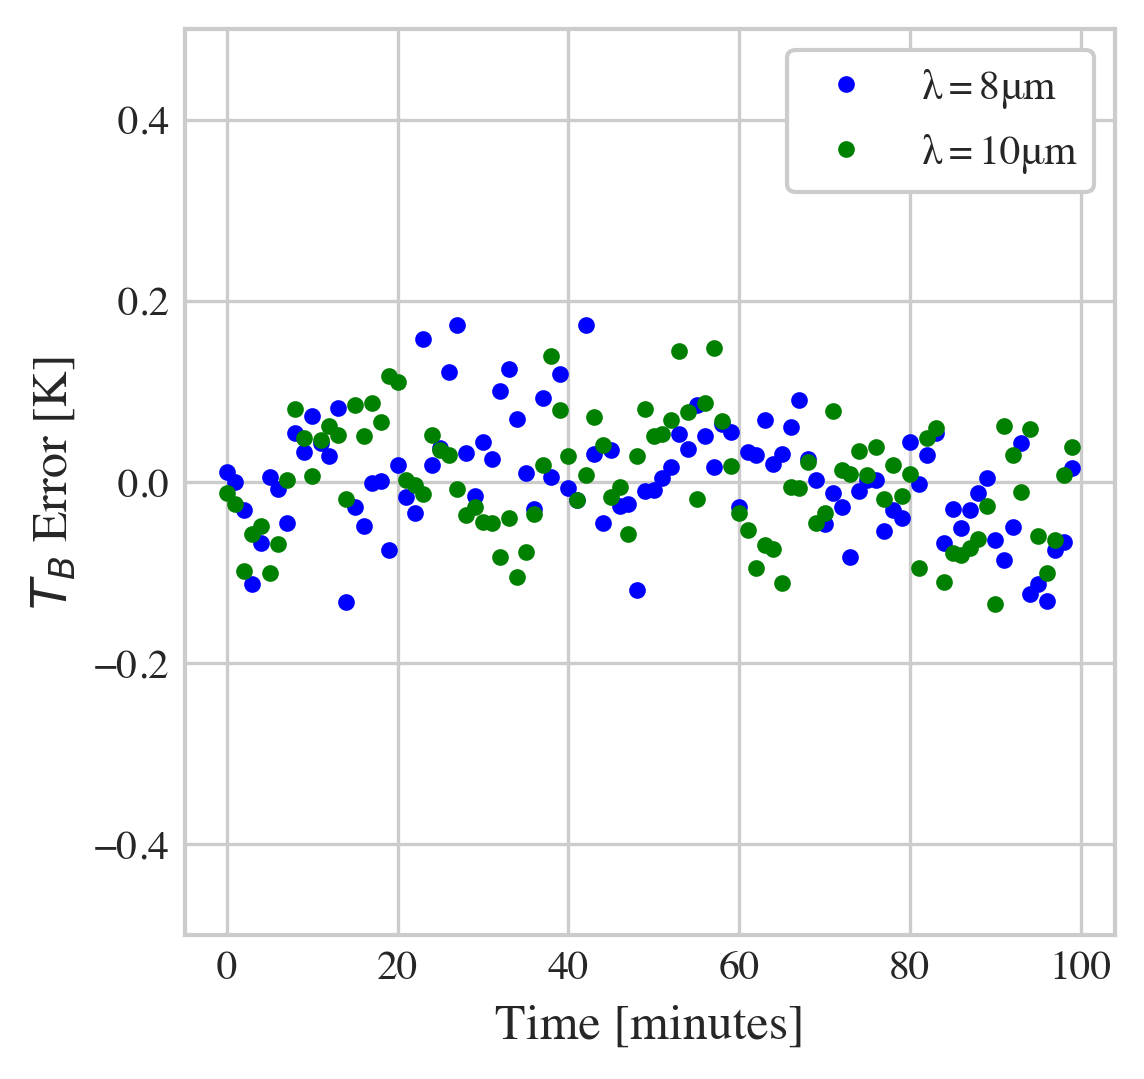

In [196]:
fig ,ax = plt.subplots(1,figsize = [4,4],sharex = True)

acktar_50 = np.mean(np.mean(imgs1_50[:,125:150,xmin:xmax],axis = 1),axis = 1)
active_50 = np.mean(np.mean(imgs1_50[:,125:150,120:125],axis = 1),axis = 1)

acktar_5 = np.mean(np.mean(imgs1_50[:,130:135,xmin:xmax],axis = 1),axis = 1)
active_5 = np.mean(np.mean(imgs1_50[:,125:150,130:140],axis = 1),axis = 1)

acktar_std = np.mean(np.mean(imgs1_50[:,y-5:y+5,xmin:xmax],axis = 1),axis = 1)
active_std = np.mean(np.mean(imgs1_50[:,y-5:y+5,active-1:active+1],axis = 1),axis = 1)


plt.plot((((active_50 - acktar_50))-136)/30,'b.',label = '$\mathdefault{\lambda = 8 \mu m}$')
plt.plot((((active_5 - acktar_50))-180)/20,'g.',label = '$\mathdefault{\lambda = 10 \mu m}$')
plt.ylim([-.5,.5])
plt.ylabel('$T_B$ Error [K]')
plt.gcf().set_dpi(300)
plt.xlabel('Time [minutes]')
plt.legend(framealpha=1, frameon=True)
legend.get_frame().set_facecolor('w')
plt.show()

In [153]:
270+80

350